In [2]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
import os

# Check subfolders inside your dataset folder
print(os.listdir("/kaggle/input/ai-powered-flood-risk-assistant"))

# If you want to see all files (recursively)
for root, dirs, files in os.walk("/kaggle/input/ai-powered-flood-risk-assistant"):
    for file in files:
        print(os.path.join(root, file))

['datasets for AI-Powered-Flood-Risk-Assistant', 'datasets']
/kaggle/input/ai-powered-flood-risk-assistant/datasets for AI-Powered-Flood-Risk-Assistant/data/preprocessed/ind_ppp_2020_constrained.tif
/kaggle/input/ai-powered-flood-risk-assistant/datasets for AI-Powered-Flood-Risk-Assistant/data/preprocessed/elevation/subset_GPM_3IMERGHH_07_20250831_085429_.txt
/kaggle/input/ai-powered-flood-risk-assistant/datasets for AI-Powered-Flood-Risk-Assistant/data/raw/hydro/HydroRIVERS_v10_as.dbf
/kaggle/input/ai-powered-flood-risk-assistant/datasets for AI-Powered-Flood-Risk-Assistant/data/raw/hydro/HydroRIVERS_v10_as.shx
/kaggle/input/ai-powered-flood-risk-assistant/datasets for AI-Powered-Flood-Risk-Assistant/data/raw/hydro/HydroRIVERS_v10_as.shp
/kaggle/input/ai-powered-flood-risk-assistant/datasets for AI-Powered-Flood-Risk-Assistant/data/raw/hydro/HydroRIVERS_v10_as.prj
/kaggle/input/ai-powered-flood-risk-assistant/datasets for AI-Powered-Flood-Risk-Assistant/data/raw/hydro/HydroRIVERS_v10_

In [4]:
# loading the precipitation dataset
data_preci = pd.read_csv(r"/kaggle/input/ai-powered-flood-risk-assistant/datasets/data/raw/precipitation/daily-rainfall-at-state-level.csv")
print("Precipation data:")
print(data_preci.head())

Precipation data:
   id        date  state_code        state_name  actual       rfs  normal  \
0   0  2009-01-01           5       Uttarakhand     0.0  0.003906    2.19   
1   1  2009-01-01          18             Assam     0.0  0.000000    0.52   
2   2  2009-01-01          16           Tripura     0.0  0.000000    0.09   
3   3  2009-01-01          36         Telangana     0.0  0.000000    0.17   
4   4  2009-01-01           2  Himachal Pradesh     0.0  0.008566    3.31   

   deviation  
0     -100.0  
1     -100.0  
2     -100.0  
3     -100.0  
4     -100.0  


In [5]:
# loading a geopackage (GADM District boundaries)
data_gadm = gpd.read_file(r"/kaggle/input/ai-powered-flood-risk-assistant/datasets/data/raw/boundaries/gadm41_IND.gpkg")
print("GADM District boundaries data:")
data_gadm.head()

GADM District boundaries data:


,GID_0,COUNTRY,geometry
0,IND,India,"MULTIPOLYGON (((76.97542 8.38514, 76.97486 8.3..."
1,Z01,India,"MULTIPOLYGON (((75.07161 32.48296, 75.06268 32..."
2,Z04,India,"MULTIPOLYGON (((78.65135 32.09228, 78.65241 32..."
3,Z05,India,"MULTIPOLYGON (((80.08794 30.79071, 80.08796 30..."
4,Z07,India,"MULTIPOLYGON (((94.19125 27.49632, 94.18690 27..."


In [6]:
# loading the shapefile of rivers
rivers = gpd.read_file(r"/kaggle/input/ai-powered-flood-risk-assistant/datasets/data/raw/hydro/HydroRIVERS_v10_as.shp")
print("Rivers data:")
rivers.head()

Rivers data:


,HYRIV_ID,NEXT_DOWN,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,ORD_STRA,ORD_CLAS,ORD_FLOW,HYBAS_L12,geometry
0,40000001,40000019,40017702,2.48,3056.6,6.9,14.93,14.9,0,0.133,1,5,7,4121166050,"LINESTRING (124.60417 55.87708, 124.61875 55.8..."
1,40000002,40000019,40017702,1.23,3056.8,6.0,12.76,12.8,0,0.120,1,6,7,4121166050,"LINESTRING (124.63542 55.88333, 124.63542 55.8..."
2,40000003,40000015,40017702,1.26,3052.8,7.4,11.80,11.8,0,0.100,1,7,7,4120080930,"LINESTRING (125.24583 55.85417, 125.23958 55.8..."
3,40000004,40000015,40017702,1.30,3052.6,7.9,2.17,24.9,0,0.195,2,6,7,4120080930,"LINESTRING (125.26042 55.84375, 125.23958 55.8..."
4,40000005,40000004,40017702,0.69,3054.1,6.4,10.84,10.8,0,0.090,1,7,8,4120080930,"LINESTRING (125.26042 55.85000, 125.26042 55.8..."


In [7]:
# loading json (GADM boundaries)
with open(r"/kaggle/input/ai-powered-flood-risk-assistant/datasets/data/raw/boundaries/gadm41_IND_2.json") as f:
    gadm_json1 = json.load(f)
print("JSON Boundary keys:", list(gadm_json1.keys()))

JSON Boundary keys: ['type', 'name', 'crs', 'features']


In [8]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 71.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
# population 
import rasterio
raster = rasterio.open(r"/kaggle/input/ai-powered-flood-risk-assistant/datasets/data/preprocessed/ind_ppp_2020_constrained.tif")
print("Raster info:", raster.meta)

Raster info: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 35075, 'height': 34497, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0008333333300071276, 0.0, 68.185416409,
       0.0, -0.0008333333299997101, 35.501250059)}


In [10]:
# loading kerala state past flood data
kerala_past_flood_data = pd.read_excel(r"/kaggle/input/ai-powered-flood-risk-assistant/datasets/data/raw/Past Flood data/Kerala_Flood_NoFlood_GSW.xlsx")
print("Kerala past flood data:")
kerala_past_flood_data.head()

Kerala past flood data:


,occurrence,label,.geo
0,7,0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,0,0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,1,0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,6,0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,9,0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [11]:
# exploring each dataset
for name, df in {"Precipitation": data_preci, "Rivers": rivers, "GADM": data_gadm, "Past data" : kerala_past_flood_data }.items():
    print(f"\n{name} Dataset Info:")
    df.info()


Precipitation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204876 entries, 0 to 204875
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          204876 non-null  int64  
 1   date        204876 non-null  object 
 2   state_code  204876 non-null  int64  
 3   state_name  204876 non-null  object 
 4   actual      187714 non-null  float64
 5   rfs         199011 non-null  float64
 6   normal      193358 non-null  float64
 7   deviation   173855 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.5+ MB

Rivers Dataset Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428959 entries, 0 to 1428958
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   HYRIV_ID    1428959 non-null  int64   
 1   NEXT_DOWN   1428959 non-null  int64   
 2   MAIN_RIV    1428959 non-null  int64   
 3   LENGTH_KM 

In [12]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
occurrence    0
label         0
.geo          0
dtype: int64


In [13]:
# EDA, Transformation and Feature Selection
# Present I'm doing the flood prediction for only kerala state

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # OneHotEncoder not used here, but included for completeness
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import Pipeline  # For potential future modeling
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [14]:
data = pd.read_excel(r"/kaggle/input/ai-powered-flood-risk-assistant/datasets/data/raw/Past Flood data/Kerala_Flood_NoFlood_GSW.xlsx")
df = pd.DataFrame(data)

print("=== Initial Data ===")
print(df.head())
print("\nData Info:")
print(df.info())

=== Initial Data ===
   occurrence  label                                               .geo
0           7      0  {"geodesic":false,"type":"Point","coordinates"...
1           0      0  {"geodesic":false,"type":"Point","coordinates"...
2           1      0  {"geodesic":false,"type":"Point","coordinates"...
3           6      0  {"geodesic":false,"type":"Point","coordinates"...
4           9      0  {"geodesic":false,"type":"Point","coordinates"...

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   occurrence  2000 non-null   int64 
 1   label       2000 non-null   int64 
 2   .geo        2000 non-null   object
dtypes: int64(2), object(1)
memory usage: 47.0+ KB
None


In [15]:

# 2. TRANSFORMATION: Parse .geo column

def parse_geo(geo_str):
    try:
        geo_dict = json.loads(geo_str.replace("'", '"'))  # Ensure valid JSON
        coords = geo_dict.get('coordinates', [np.nan, np.nan])
        return pd.Series([coords[0], coords[1]])  # lon, lat
    except Exception as e:
        print(f"Error parsing: {geo_str} | {e}")
        return pd.Series([np.nan, np.nan])
# Apply parsing
df[['longitude', 'latitude']] = df['.geo'].apply(parse_geo)

# Drop the original .geo column
df = df.drop(columns=['.geo'])

print("\n=== After Parsing Coordinates ===")
print(df.head())



=== After Parsing Coordinates ===
   occurrence  label  longitude   latitude
0           7      0  76.780040  10.709939
1           0      0  76.342112  10.227095
2           1      0  76.665505   9.211999
3           6      0  76.400502   9.366958
4           9      0  76.586903  10.296714


In [16]:

# 3. EDA (Exploratory Data Analysis)

print("\n=== Basic Statistics ===")
print(df.describe())

print("\n=== Label Distribution ===")
print(df['label'].value_counts())

# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())



=== Basic Statistics ===
        occurrence        label    longitude     latitude
count  2000.000000  2000.000000  2000.000000  2000.000000
mean     26.393500     0.500000    76.299712    10.232072
std      30.837966     0.500125     0.452064     0.942358
min       0.000000     0.000000    74.922774     8.306946
25%       3.000000     0.000000    76.108550     9.477002
50%       9.500000     0.500000    76.402748    10.037326
75%      44.000000     1.000000    76.540303    10.828966
max     100.000000     1.000000    77.265131    12.686233

=== Label Distribution ===
label
0    1000
1    1000
Name: count, dtype: int64

=== Missing Values ===
occurrence    0
label         0
longitude     0
latitude      0
dtype: int64


Text(0.5, 1.0, 'Flood Label Distribution')

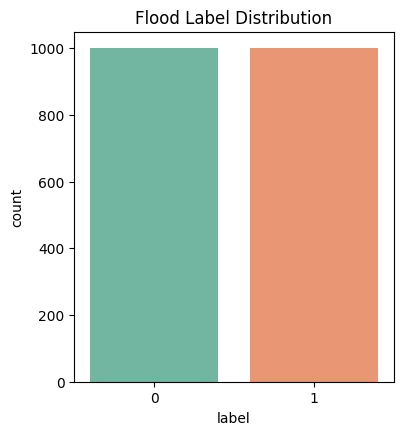

In [17]:
# Visualizations
plt.figure(figsize=(14, 10))

# Plot 1: Label Distribution
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Flood Label Distribution')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Occurrence')

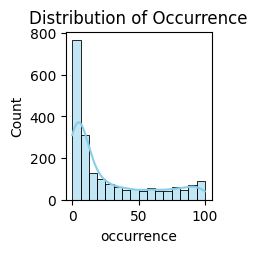

In [18]:
# Plot 2: Occurrence Distribution (flood frequency)
plt.subplot(2, 3, 2)
sns.histplot(df['occurrence'], kde=True, color='skyblue')
plt.title('Distribution of Occurrence')


Text(0, 0.5, 'Latitude')

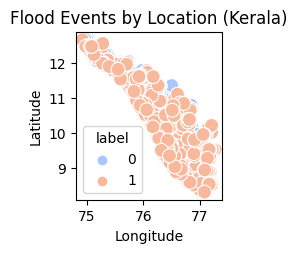

In [19]:
# Plot 3: Latitude vs Longitude (Spatial Plot)
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='label', palette='coolwarm', s=100)
plt.title('Flood Events by Location (Kerala)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0.5, 1.0, 'Occurrence by Flood Label')

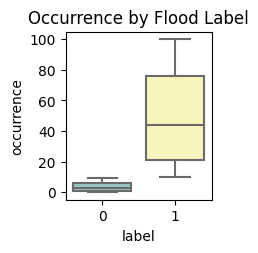

In [20]:
# Plot 4: Boxplot of Occurrence by Label
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='label', y='occurrence', palette='Set3')
plt.title('Occurrence by Flood Label')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Feature Correlation Heatmap')

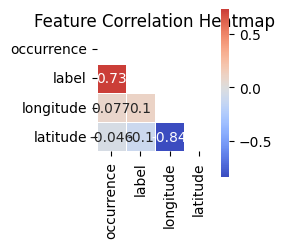

In [21]:
# Plot 5: Correlation Heatmap
plt.subplot(2, 3, 5)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # hide upper triangle for clarity
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')

Text(0.5, 1.0, 'Missing Data Pattern')

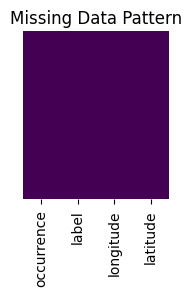

In [22]:
# missing values heatmap
plt.subplot(2, 3, 6)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')

In [23]:
# Check total missing values per column
print(df.isnull().sum())
print("Any missing values?", df.isnull().any().any())

occurrence    0
label         0
longitude     0
latitude      0
dtype: int64
Any missing values? False


In [24]:
# Feature selection for Past kerala flood dataset
# For this dataset there are only 3 input features occurence,latitude and longitude and 1 output feature "label".
# All features are important so no feature selection for this dataset

In [25]:
# Method 1: Correlation with target
print("Correlation with label:")
print(df[['occurrence', 'latitude', 'longitude']].corrwith(df['label']).abs().sort_values(ascending=False))

# Method 2: SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(df[['occurrence', 'latitude', 'longitude']], df['label'])
selected_features = df[['occurrence', 'latitude', 'longitude']].columns[selector.get_support()]
print("\nSelectKBest selected:", selected_features.tolist())


Correlation with label:
occurrence    0.732089
latitude      0.104580
longitude     0.101551
dtype: float64

SelectKBest selected: ['occurrence', 'latitude']


In [26]:
# So here with the occurrence and latitude, we cannot exaclty specify the output.
# So all features are import for the above dataset

In [28]:
# scaling the data
# Log-transform 'occurrence' to reduce skew 
df['occurrence_log'] = np.log1p(df['occurrence'])

# Initialize scaler
scaler = StandardScaler()

# Select features to scale
features_to_scale = ['occurrence_log', 'latitude', 'longitude']

# Fit and transform
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df_scaled.rename(columns={
    'occurrence_log': 'occurrence_log_scaled',
    'latitude': 'latitude_scaled',
    'longitude': 'longitude_scaled'
}, inplace=True)

# Keep original and scaled side-by-side for comparison
df_final = df.join(df_scaled[['occurrence_log_scaled', 'latitude_scaled', 'longitude_scaled']])
print(df_final)

      occurrence  label  longitude   latitude  occurrence_log  \
0              7      0  76.780040  10.709939        2.079442   
1              0      0  76.342112  10.227095        0.000000   
2              1      0  76.665505   9.211999        0.693147   
3              6      0  76.400502   9.366958        1.945910   
4              9      0  76.586903  10.296714        2.302585   
...          ...    ...        ...        ...             ...   
1995          79      1  77.054027   9.957600        4.382027   
1996          71      1  76.813727  10.386546        4.276666   
1997          50      1  75.086716  12.481866        3.931826   
1998          11      1  76.461138   9.348992        2.484907   
1999          21      1  75.551594  11.828342        3.091042   

      occurrence_log_scaled  latitude_scaled  longitude_scaled  
0                 -0.320881         0.507225          1.062787  
1                 -1.833787        -0.005282          0.093814  
2                 -1.329

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

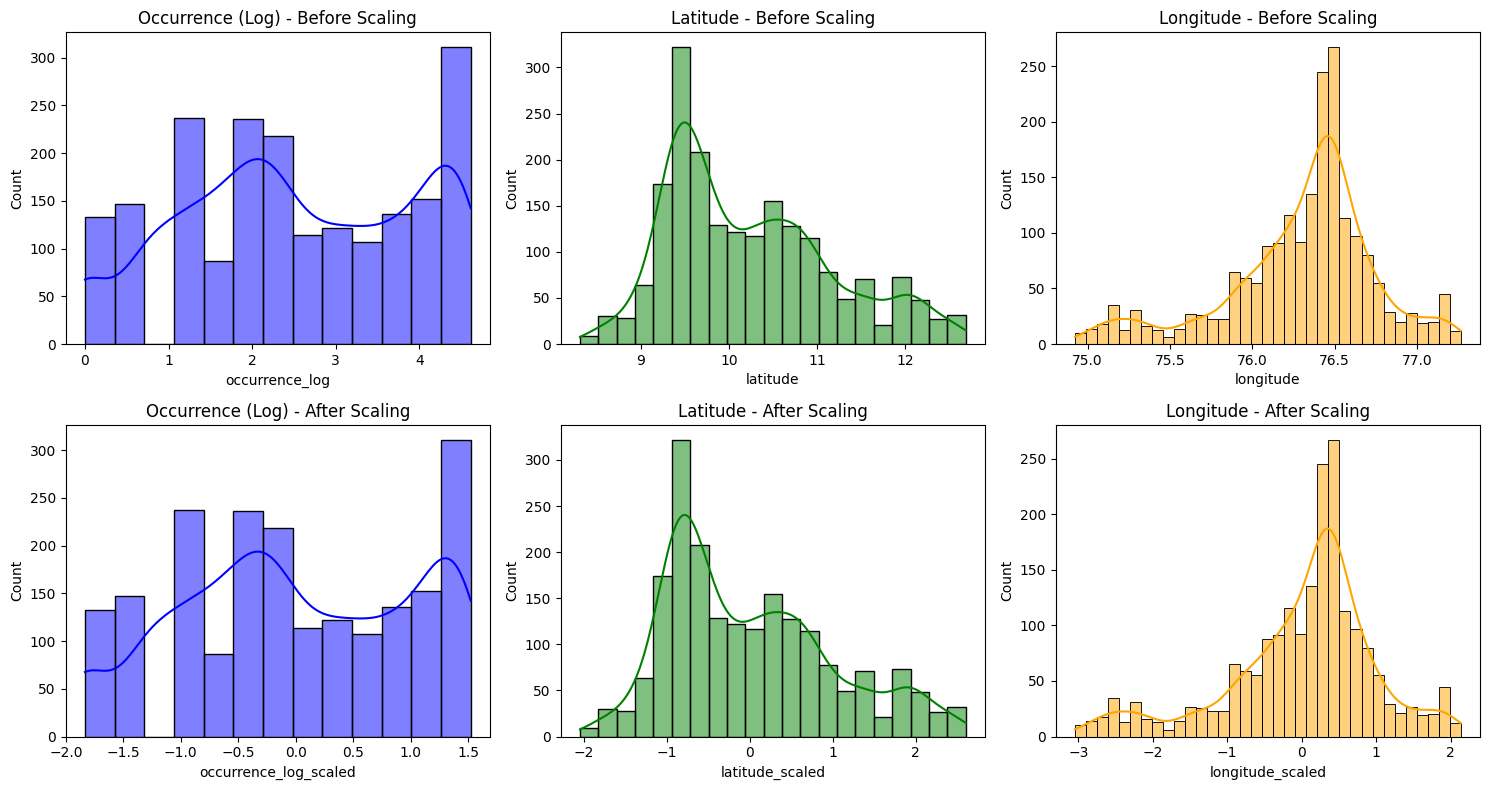

In [31]:
# visualisation before and after scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Before Scaling
sns.histplot(df['occurrence_log'], kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title('Occurrence (Log) - Before Scaling')

sns.histplot(df['latitude'], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title('Latitude - Before Scaling')

sns.histplot(df['longitude'], kde=True, ax=axes[0,2], color='orange')
axes[0,2].set_title('Longitude - Before Scaling')

# After scaling
sns.histplot(df_final['occurrence_log_scaled'], kde=True, ax=axes[1,0], color='blue')
axes[1,0].set_title('Occurrence (Log) - After Scaling')

sns.histplot(df_final['latitude_scaled'], kde=True, ax=axes[1,1], color='green')
axes[1,1].set_title('Latitude - After Scaling')

sns.histplot(df_final['longitude_scaled'], kde=True, ax=axes[1,2], color='orange')
axes[1,2].set_title('Longitude - After Scaling')

plt.tight_layout()
plt.show()

In [32]:
# As of now, all the remaining datasets 

# 1. boundaries
# gadm41_IND_shp
# gadm41_IND_gpkg
# gadm41_IND_2.json
# gadm41_IND_3.json

# 2.Hydro
# hydroRIVERS_v10_as.dbf
# hydroRIVERS_v10_as.prj
# hydroRIVERS_V10_as.sbn
# hydroRIVERS_v10_as.sbx
# hydroRIVERS_v10_as.shp
# hydroRIVERS_v10_as.shx


# 3. Precipitation
# daily-rainfall-at-state-level.xlsx


# 4. Population
# ind_ppp_2020_constrained.tif

# After building the base model, we can add all these one by one and integrate them.

In [ ]:
# Work to do next
# 1. Train the First Model
# 2. Add One External Dataset at a Time
# 3. Build Final “Super Model”
# 4. Create a Flood Risk Map
# 5. Adding a Mini Chatbot for assistance